In [60]:
# !pip install --upgrade selenium

In [19]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from IPython.display import display, Image

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time

import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin, quote_plus

# read data

In [61]:
csv=r"C:\Users\User\Downloads\Food Recommendation survey(1-4).xlsx"
sheet='basic details'
df = pd.read_excel(csv,sheet_name=sheet)
df.head(2)

,Mood,Mood.1,Unnamed: 2,Cuisine,Cuisine.1,Unnamed: 5,Food Items,Food Items.1,Unnamed: 8,Ratings
0,1.0,Happy/Cheerful,NaN,1.0,Beverage,NaN,1,chicken minced salad,NaN,1.0
1,2.0,Sad,NaN,2.0,Chinese,NaN,2,japanese curry arancini with barley salsa,NaN,2.0


In [63]:
df.columns

Index(['Mood', 'Mood.1', 'Unnamed: 2', 'Cuisine', 'Cuisine.1', 'Unnamed: 5',
       'Food Items', 'Food Items.1', 'Unnamed: 8', 'Ratings'],
      dtype='object')

# list of food items

In [65]:
food_items=df['Food Items.1'].tolist()
print(food_items)

['chicken minced salad', 'japanese curry arancini with barley salsa', 'baked multigrain murukku', 'baked namak para', 'spinach and feta crepes', 'mixed berry & banana smoothie', 'khichdi', 'steam bunny chicken bao', 'meat lovers pizza', 'chicken parmigiana with tomato sauce', 'caramelized sesame smoked almonds', 'Masala tea', 'Mojito', 'filter coffee', 'peri peri chicken satay', 'chicken biryani', 'buldak (hot and spicy chicken)', 'spicy chicken masala', 'chilli chicken', 'chicken tenders', 'chicken and mushroom lasagna', 'chicken roulade', 'chicken shami kebab', 'fish with white sauce', 'chettinad fish fry', 'spanish fish fry', 'green cucumber shots', 'veg fried rice', 'chicken paella', 'vegetable pulao', 'vegetable bruschetta', 'egg and cheddar cheese sandwich', 'egg in a blanket', 'kaju katli', 'mixed vegetable soup', 'chocolate lava cake', 'gulab jamun', 'dry fruit cake', 'vegetable manchurian', 'baked wild berry cheesecake', 'mexican pizza', 'fruit cube salad', 'veg hakka noodles'

# method to get 1 link per food item

In [66]:
image_urls=[]
def search_and_download_images(food_items):
    print(food_items)
    for item in food_items:
        search_query = f"{item}"
        search_url = f"https://www.google.com/search?q={item}&tbm=isch"
        response = requests.get(search_url)
        soup = BeautifulSoup(response.text, 'html.parser')
        image_tag = soup.find_all('img')
        src_links = [img['src'] for img in soup.find_all('img') if img.get('src') and not img['src'].endswith('.gif')] #images, not gifs
        image_url = src_links[0]
        image_urls.append(image_url)
        print(image_url)

In [67]:
if __name__ == "__main__":
#     food_items = ["summer salad", "hawaiian pizza", "strawberry tart"]
    search_and_download_images(food_items)


['chicken minced salad', 'japanese curry arancini with barley salsa', 'baked multigrain murukku', 'baked namak para', 'spinach and feta crepes', 'mixed berry & banana smoothie', 'khichdi', 'steam bunny chicken bao', 'meat lovers pizza', 'chicken parmigiana with tomato sauce', 'caramelized sesame smoked almonds', 'Masala tea', 'Mojito', 'filter coffee', 'peri peri chicken satay', 'chicken biryani', 'buldak (hot and spicy chicken)', 'spicy chicken masala', 'chilli chicken', 'chicken tenders', 'chicken and mushroom lasagna', 'chicken roulade', 'chicken shami kebab', 'fish with white sauce', 'chettinad fish fry', 'spanish fish fry', 'green cucumber shots', 'veg fried rice', 'chicken paella', 'vegetable pulao', 'vegetable bruschetta', 'egg and cheddar cheese sandwich', 'egg in a blanket', 'kaju katli', 'mixed vegetable soup', 'chocolate lava cake', 'gulab jamun', 'dry fruit cake', 'vegetable manchurian', 'baked wild berry cheesecake', 'mexican pizza', 'fruit cube salad', 'veg hakka noodles'

In [68]:
len(image_urls)

54

In [69]:
df.shape[0]

54

In [70]:
df['image_urls']=image_urls
df.head(2)

,Mood,Mood.1,Unnamed: 2,Cuisine,Cuisine.1,Unnamed: 5,Food Items,Food Items.1,Unnamed: 8,Ratings,image_urls
0,1.0,Happy/Cheerful,NaN,1.0,Beverage,NaN,1,chicken minced salad,NaN,1.0,https://encrypted-tbn0.gstatic.com/images?q=tb...
1,2.0,Sad,NaN,2.0,Chinese,NaN,2,japanese curry arancini with barley salsa,NaN,2.0,https://encrypted-tbn0.gstatic.com/images?q=tb...


In [71]:
df.to_csv('Food_with_urls.csv',index=False)

# display images

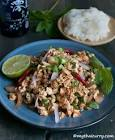

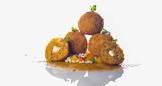

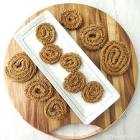

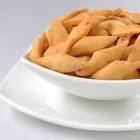

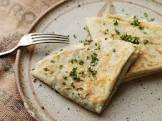

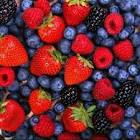

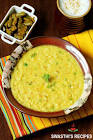

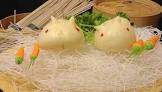

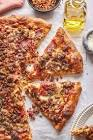

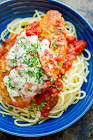

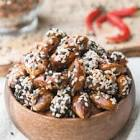

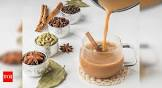

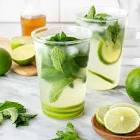

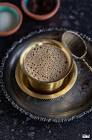

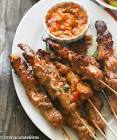

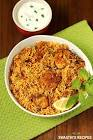

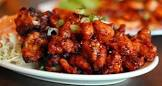

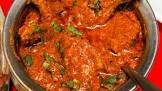

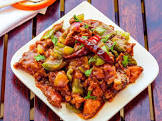

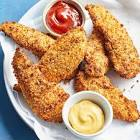

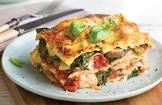

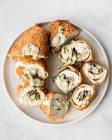

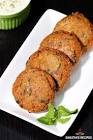

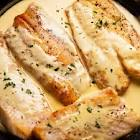

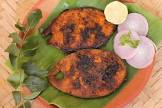

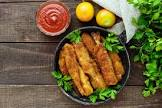

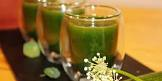

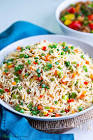

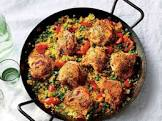

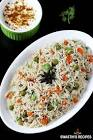

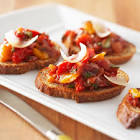

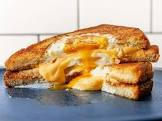

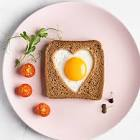

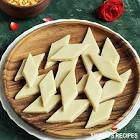

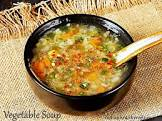

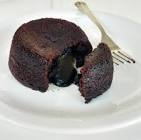

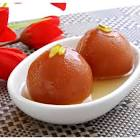

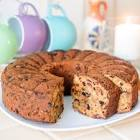

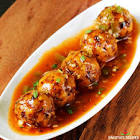

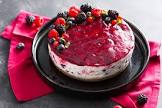

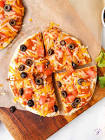

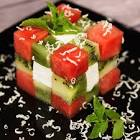

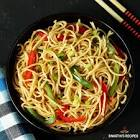

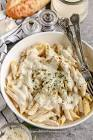

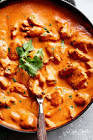

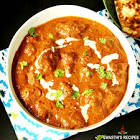

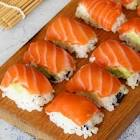

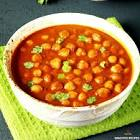

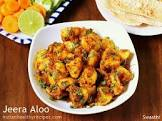

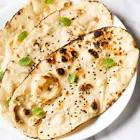

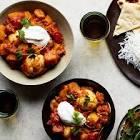

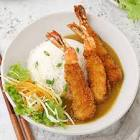

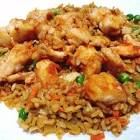

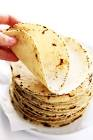

0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
18    None
19    None
20    None
21    None
22    None
23    None
24    None
25    None
26    None
27    None
28    None
29    None
30    None
31    None
32    None
33    None
34    None
35    None
36    None
37    None
38    None
39    None
40    None
41    None
42    None
43    None
44    None
45    None
46    None
47    None
48    None
49    None
50    None
51    None
52    None
53    None
Name: image_urls, dtype: object

In [73]:
import requests
from IPython.display import display, Image
import pandas as pd
def display_image(url):
    response = requests.get(url)
    image = Image(response.content)
    display(image)

# Apply the function to each row in the DataFrame
df['image_urls'].apply(display_image)